In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import glob 

## Data Loading and Preparation¶

### Loading Data¶

In [72]:
file = os.listdir('uber_data')[-7:]

In [73]:
file

['.DS_Store',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv']

In [74]:
file.remove('.DS_Store')

In [75]:
file

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv']

In [76]:
path = ("uber_data")
final = pd.DataFrame()
for file in file:
    df = pd.read_csv(path+'/'+file, encoding= 'utf-8')
    final = pd.concat([final,df])

In [77]:
final.shape

(4534327, 4)

In [78]:
final.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


###  Data Preparation¶

##### Lat : The latitude of the Uber pickup

##### Lon : The longitude of the Uber pickup

##### Base : The TLC base company code affiliated with the Uber pickup

In [79]:
df=final.copy()

In [80]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [81]:
df.shape

(4534327, 4)

In [82]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [83]:
# change datatype of data/time
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")

In [84]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [85]:
df.head(1)

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.769,-73.9549,B02512


In [86]:

df['weekday']=df['Date/Time'].dt.day_name()
df['day']=df['Date/Time'].dt.day
df['minute']=df['Date/Time'].dt.minute
df['month']=df['Date/Time'].dt.month
df['hour']=df['Date/Time'].dt.hour

In [87]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int64
minute                int64
month                 int64
hour                  int64
dtype: object

In [88]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0


In [89]:
df['weekday'].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: weekday, dtype: int64

In [90]:
df[df.weekday == 'Sunday']

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
6965,2014-04-06 00:00:00,40.6547,-74.3033,B02512,Sunday,6,0,4,0
6966,2014-04-06 00:00:00,40.7356,-74.0006,B02512,Sunday,6,0,4,0
6967,2014-04-06 00:00:00,40.7421,-74.0041,B02512,Sunday,6,0,4,0
6968,2014-04-06 00:00:00,40.7401,-74.0053,B02512,Sunday,6,0,4,0
6969,2014-04-06 00:01:00,40.7368,-73.9877,B02512,Sunday,6,1,4,0
...,...,...,...,...,...,...,...,...,...
650709,2014-05-25 23:34:00,40.7470,-73.9527,B02764,Sunday,25,34,5,23
650710,2014-05-25 23:49:00,40.7646,-73.9778,B02764,Sunday,25,49,5,23
650711,2014-05-25 23:51:00,40.7348,-74.0071,B02764,Sunday,25,51,5,23
650712,2014-05-25 23:53:00,40.7299,-73.9576,B02764,Sunday,25,53,5,23


In [91]:
df['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [92]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [93]:
df['weekday'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

#### Analysis of journey by Week-days

In [94]:
import plotly.express as px

In [95]:
px.bar(x=df['weekday'].value_counts().index,
      y=df['weekday'].value_counts()
      )

#### seems to have highest sales on wednesday

### Analysis by Hour

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

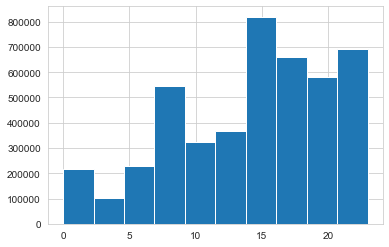

In [96]:
plt.hist(df['hour']) # histogram

#### It peaks during evening time when people are logging off from work

In [97]:
df['month'].unique()

array([4, 8, 9, 7, 6, 5])

In [98]:
for i,month in enumerate(df['month'].unique()):
    print(month)

4
8
9
7
6
5


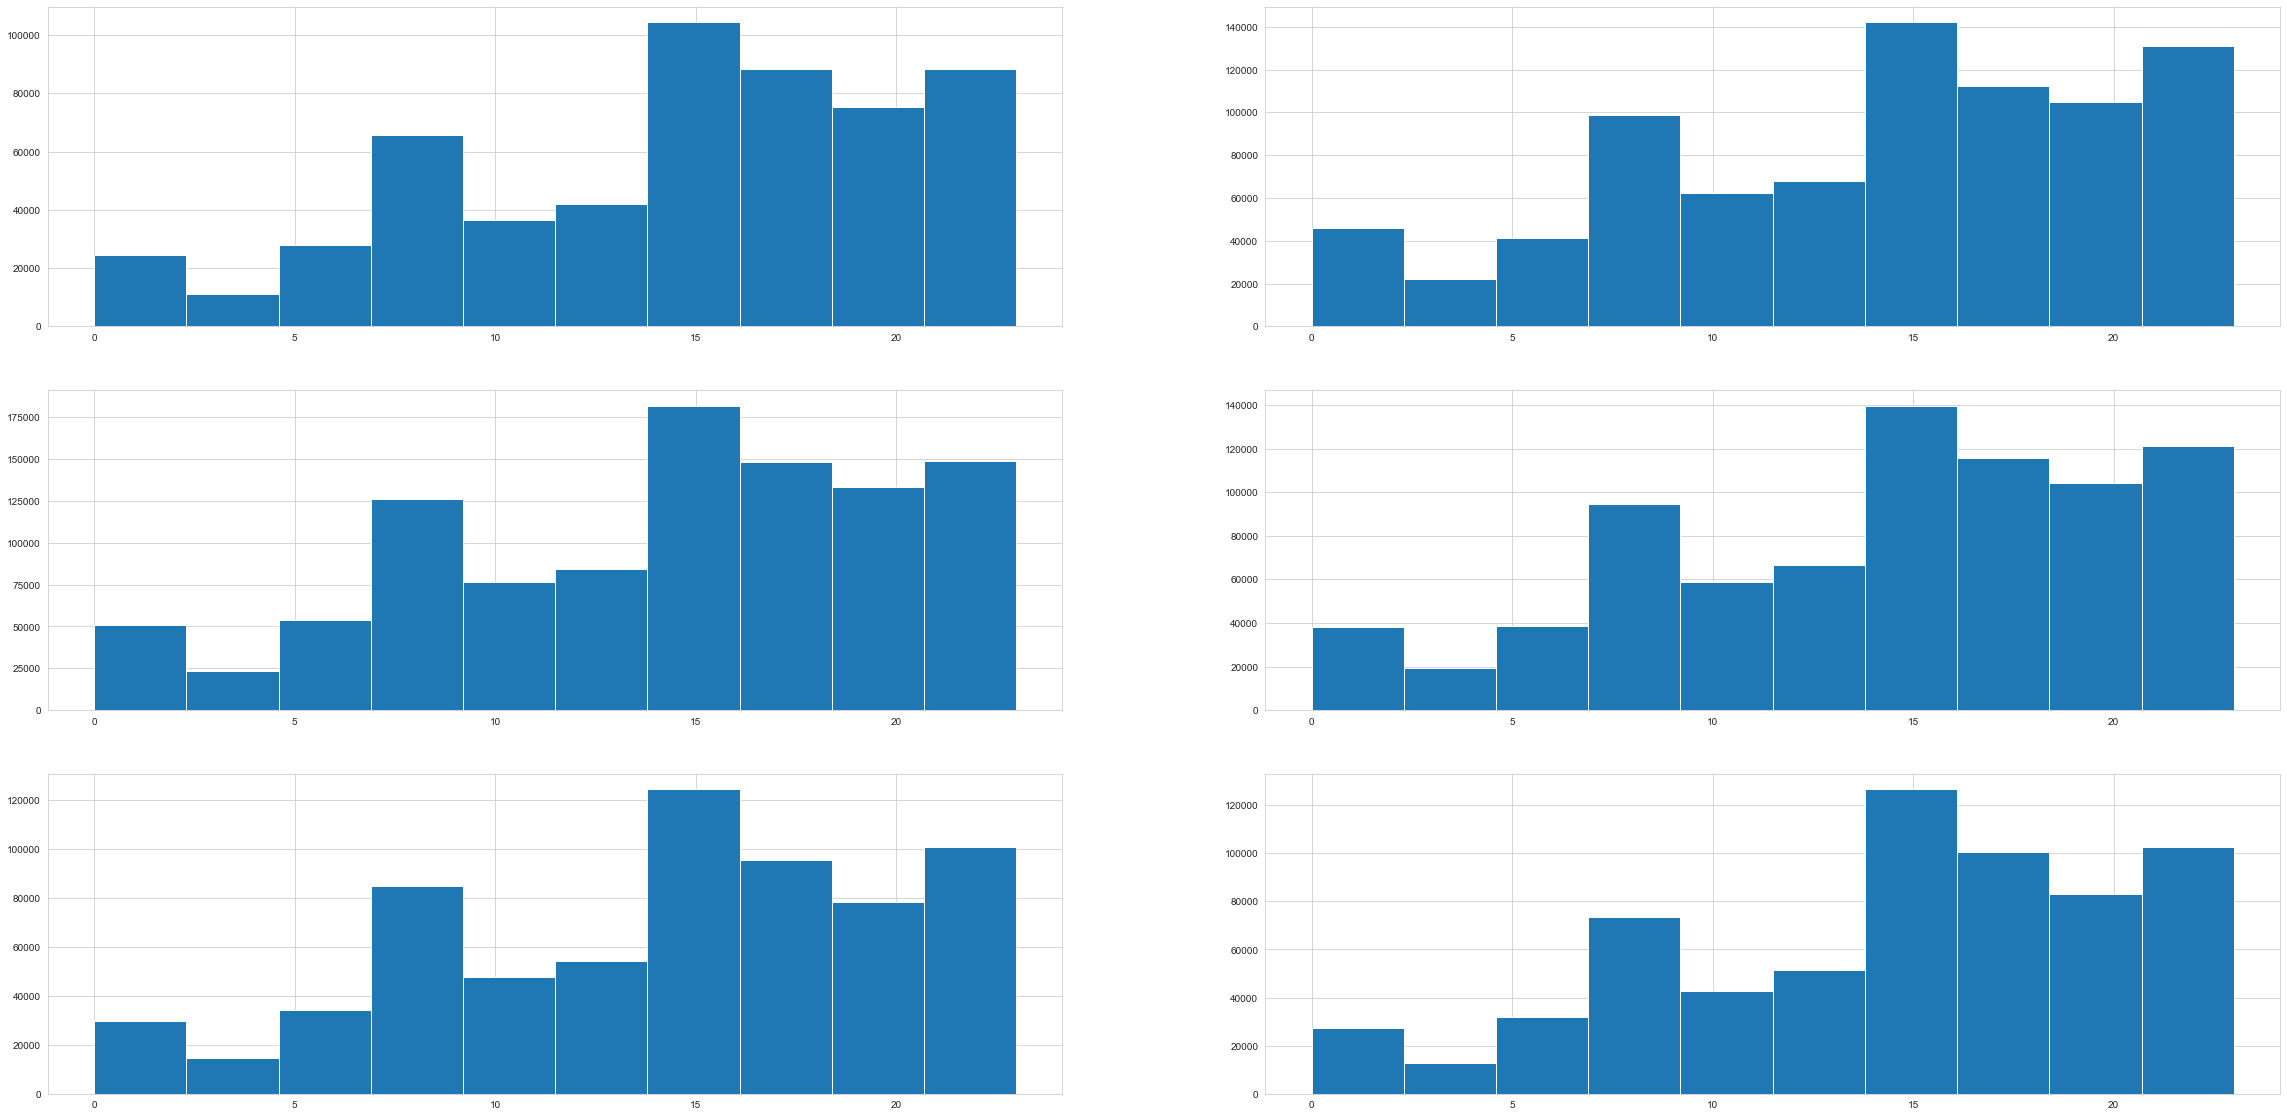

In [99]:

plt.figure(figsize=(40,20))
for i,month in enumerate(df['month'].unique()):
    plt.subplot(3,2,i+1)
    df[df['month']==month]['hour'].hist()


#### Analysis of Rush of each hour in each month

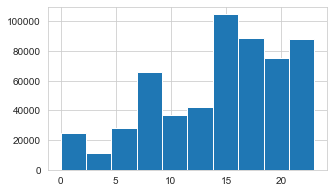

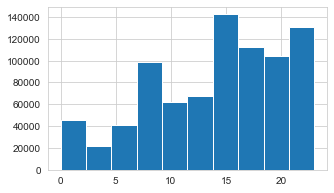

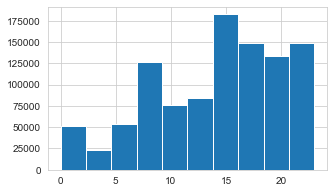

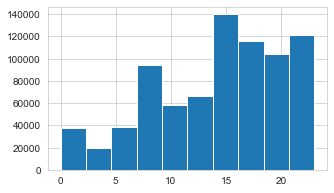

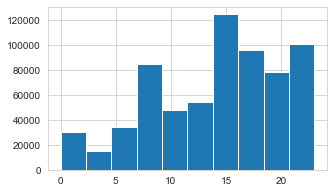

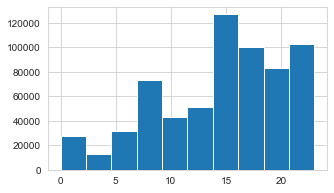

In [100]:
for i in df['month'].unique():
    plt.figure(figsize=(5,3))
    df[df['month']==i]['hour'].hist()
    

#### analysis of which month has max rides

In [101]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [102]:
trace1 = go.Bar( 
        x = df.groupby('month')['hour'].sum().index,
        y = df.groupby('month')['hour'].sum(),
        name= 'Priority')
iplot([trace1])

#### Analysis of Journey of Each  Day

Text(0.5, 1.0, 'Journeys by Month Day')

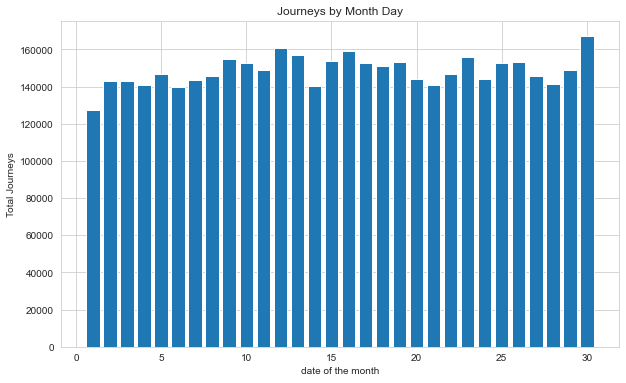

In [103]:
plt.figure(figsize=(10,6))
plt.hist(df['day'], bins=30, rwidth=.8, range=(0.5, 30.5))
plt.xlabel('date of the month')
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day')

#### Analysis of Total rides month wise

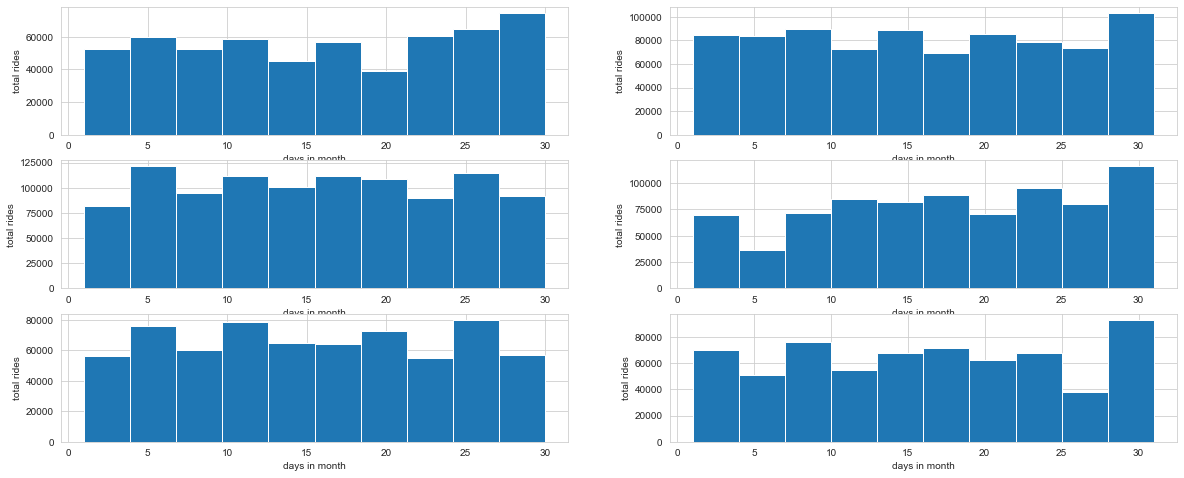

In [104]:
plt.figure(figsize=(20,8))
for i,month in enumerate(df['month'].unique(),1):
    plt.subplot(3,2,i)
    df_out=df[df['month']==month]
    plt.hist(df_out['day'])
    plt.xlabel('days in month'.format(i))
    plt.ylabel('total rides')

### getting Rush in hour 

<AxesSubplot:xlabel='hour', ylabel='Lat'>

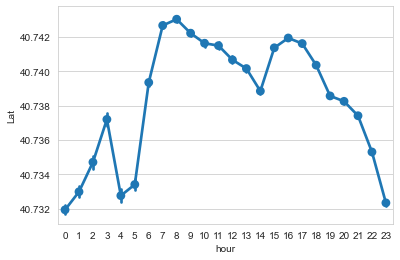

In [111]:
sns.set_style(style='whitegrid')
sns.pointplot(x="hour",y="Lat",data=df)

##### adding hue params

Text(0.5, 1.0, 'hoursoffday vs latiitide of passenger')

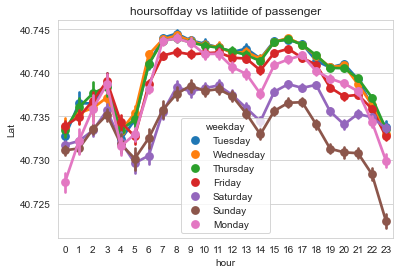

In [112]:
ax=sns.pointplot(x="hour",y="Lat", hue="weekday",data=df)
ax.set_title('hoursoffday vs latiitide of passenger')

#### to analyse which base number gets popular by month name

In [113]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0


In [114]:
df['Base'].head()

0    B02512
1    B02512
2    B02512
3    B02512
4    B02512
Name: Base, dtype: object

In [115]:
df.groupby(['Base','month'])['Date/Time'].count()

Base    month
B02512  4         35536
        5         36765
        6         32509
        7         35021
        8         31472
        9         34370
B02598  4        183263
        5        260549
        6        242975
        7        245597
        8        220129
        9        240600
B02617  4        108001
        5        122734
        6        184460
        7        310160
        8        355803
        9        377695
B02682  4        227808
        5        222883
        6        194926
        7        196754
        8        173280
        9        197138
B02764  4          9908
        5          9504
        6          8974
        7          8589
        8         48591
        9        178333
Name: Date/Time, dtype: int64

In [116]:
base=df.groupby(['Base','month'])['Date/Time'].count().reset_index()
base

,Base,month,Date/Time
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472
5,B02512,9,34370
6,B02598,4,183263
7,B02598,5,260549
8,B02598,6,242975
9,B02598,7,245597


#### to analyse which base number gets popular by month name

<AxesSubplot:xlabel='month', ylabel='Date/Time'>

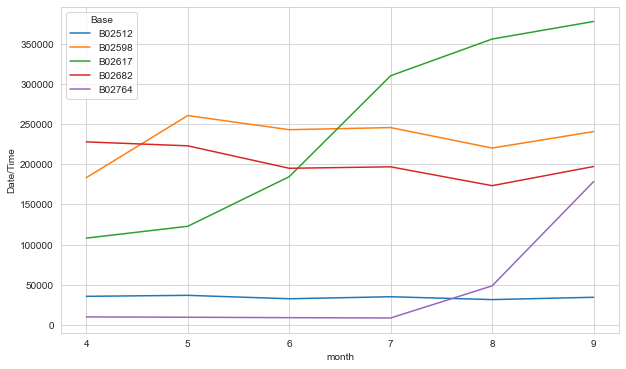

In [117]:
plt.figure(figsize=(10,6))
sns.lineplot(x='month',y='Date/Time',hue='Base',data=base)